In [1]:
!pip install opencv-python mediapipe scikit-learn


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import os

import cv2


DATA_DIR = './data2'
if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

number_of_classes = 6
dataset_size = 100

cap = cv2.VideoCapture(0)
for j in range(number_of_classes):
    if not os.path.exists(os.path.join(DATA_DIR, str(j))):
        os.makedirs(os.path.join(DATA_DIR, str(j)))

    print('Collecting data for class {}'.format(j))

    done = False
    while True:
        ret, frame = cap.read()
        cv2.putText(frame, 'Ready? Press "Q" ! :)', (100, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3,
                    cv2.LINE_AA)
        cv2.imshow('frame', frame)
        if cv2.waitKey(25) == ord('q'):
            break

    counter = 0
    while counter < dataset_size:
        ret, frame = cap.read()
        cv2.imshow('frame', frame)
        cv2.waitKey(25)
        cv2.imwrite(os.path.join(DATA_DIR, str(j), '{}.jpg'.format(counter)), frame)

        counter += 1

cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [3]:
import mediapipe as mp 
import cv2 
import os
import matplotlib.pyplot as plt
import pickle

In [4]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

I0000 00:00:1717250375.026410  140807 gl_context.cc:357] GL version: 2.1 (2.1 INTEL-22.5.11), renderer: Intel(R) Iris(TM) Plus Graphics 645


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1717250375.044296  143170 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1717250375.065916  143170 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


### See if hands could be detected

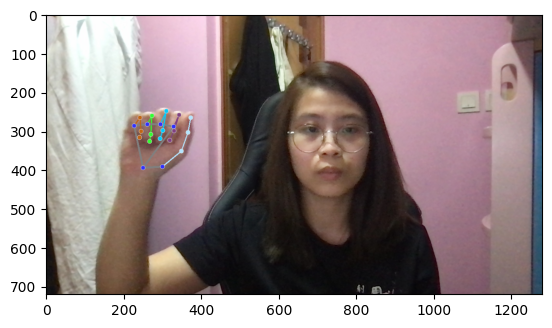

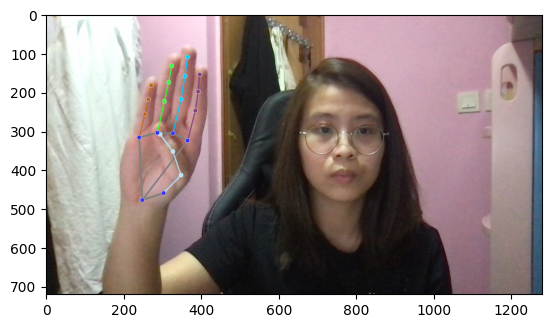

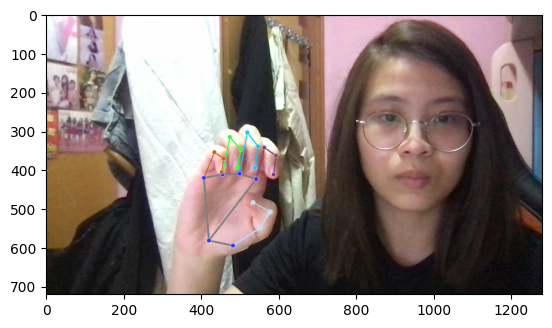

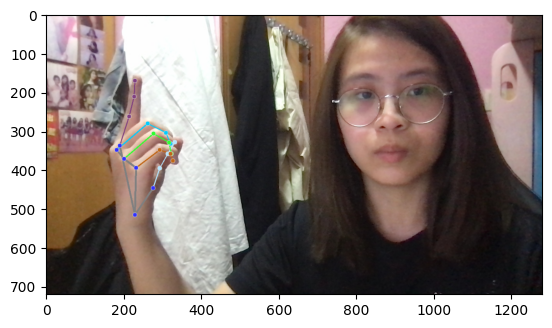

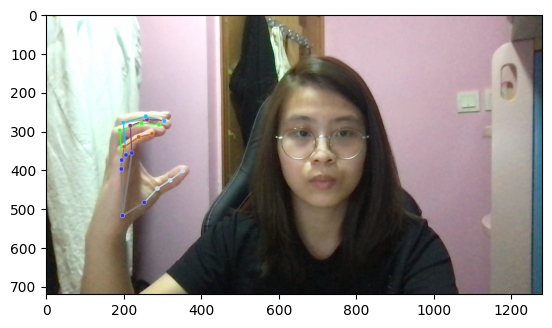

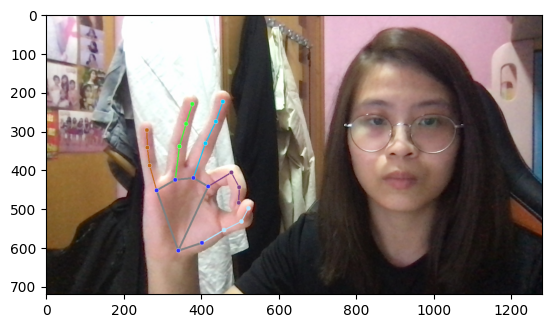

In [6]:

DATA_DIR = './data2'

for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR,dir_))[:1]:
        img = cv2.imread(os.path.join(DATA_DIR, dir_,img_path))
        img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks: 
                mp_drawing.draw_landmarks(
                    img_rgb,
                    hand_landmarks,
                    mp_hands.HAND_CONNECTIONS,
                    mp_drawing_styles.get_default_hand_landmarks_style(),
                    mp_drawing_styles.get_default_hand_connections_style()
                )
        plt.figure()
        plt.imshow(img_rgb)
plt.show()






### Data Processing

In [7]:

DATA_DIR = './data2'

data = []
labels = []
for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR,dir_)):
        data_aux = []
        img = cv2.imread(os.path.join(DATA_DIR, dir_,img_path))
        img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks: 
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x)
                    data_aux.append(y)

            data.append(data_aux)
            labels.append(dir_)

f = open('data2.pickle', 'wb')
pickle.dump({'data': data,'labels':labels},f)
f.close()

In [8]:
import pickle
data_dict = pickle.load(open('./data2.pickle', 'rb'))
print(data_dict.keys())
print(data_dict)

dict_keys(['data', 'labels'])
{'data': [[0.19549560546875, 0.5499055981636047, 0.2345910668373108, 0.5446023941040039, 0.2729082703590393, 0.4890843629837036, 0.28619879484176636, 0.4224419891834259, 0.2915170192718506, 0.3702141344547272, 0.25718924403190613, 0.4026084840297699, 0.268652081489563, 0.3607126474380493, 0.25836536288261414, 0.41791462898254395, 0.24981561303138733, 0.45137280225753784, 0.2307007610797882, 0.39383354783058167, 0.24266129732131958, 0.34609854221343994, 0.23516592383384705, 0.41658222675323486, 0.23010139167308807, 0.44565215706825256, 0.20466770231723785, 0.3934146761894226, 0.21368061006069183, 0.36326175928115845, 0.21154603362083435, 0.4304254651069641, 0.20875896513462067, 0.4552048444747925, 0.17796668410301208, 0.39879921078681946, 0.18947365880012512, 0.36965107917785645, 0.19143304228782654, 0.41844019293785095, 0.18903060257434845, 0.441010057926178], [0.24594974517822266, 0.49942514300346375, 0.28155624866485596, 0.5153161287307739, 0.32403248548

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [10]:
data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])

In [10]:
print(data)

[[0.25285661 0.60143512 0.28673875 ... 0.48974451 0.25627291 0.51691437]
 [0.24339211 0.66887432 0.27763492 ... 0.56226987 0.24190967 0.58908582]
 [0.18102753 0.68634039 0.21944869 ... 0.55889618 0.17105135 0.58066571]
 ...
 [0.26597956 0.77990097 0.31503484 ... 0.58703041 0.26740527 0.62606162]
 [0.23713154 0.74973315 0.28417271 ... 0.52972227 0.19493853 0.56878817]
 [0.23614219 0.81572831 0.28734028 ... 0.59659374 0.22967872 0.63719571]]


In [11]:
print(labels)

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2

In [11]:
x_train, x_test, y_train, y_test = train_test_split(data, labels,test_size=0.2,shuffle=True,stratify=labels)
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)

In [12]:
score = accuracy_score(y_predict,y_test)
print('{}% of samples were classified correctly!'.format(score*100))

100.0% of samples were classified correctly!


### Test Visualize Image

In [13]:
import pickle
f = open('model-test3.p','wb')
pickle.dump({'model':model},f)
f.close()

In [14]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
hands = mp_hands.Hands(static_image_mode=True,min_detection_confidence=0.3)

I0000 00:00:1717250509.594991  140807 gl_context.cc:357] GL version: 2.1 (2.1 INTEL-22.5.11), renderer: Intel(R) Iris(TM) Plus Graphics 645


W0000 00:00:1717250509.616382  146165 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1717250509.634051  146165 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [15]:
import pickle
import cv2 
import mediapipe as mp 
import numpy as np

model_dict = pickle.load(open('./model-test3.p','rb'))
model = model_dict['model']

labels_dict = {0:'A', 1:'B',2:'C',3:'D',4:'E',5:'F'}

cap = cv2.VideoCapture(0)

while True:
    data_aux = []
    x_ = []
    y_ = []
    ret,frame = cap.read()
    H, W, _ = frame.shape
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(frame_rgb)
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                frame,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style()
            )
        for hand_landmarks in results.multi_hand_landmarks:
            for i in range(len(hand_landmarks.landmark)):
                x = hand_landmarks.landmark[i].x
                y = hand_landmarks.landmark[i].y
                data_aux.append(x)
                data_aux.append(y)
                x_.append(x)
                y_.append(y)

        x1 = int(min(x_) * W)
        y1 = int(min(y_) * H)

        x2 = int(max(x_) * W)
        y2 = int(max(y_)* H)


        prediction = model.predict([np.asarray(data_aux)])

        predicted_character = labels_dict[int(prediction[0])]

        cv2.rectangle(frame,(x1,y1-10),(x2,y2),(0,0,0),4)
        cv2.putText(frame,predicted_character,(x1,y1-10),cv2.FONT_HERSHEY_COMPLEX,1.3,(0,0,0),3, cv2.LINE_AA)


    cv2.imshow('frame',frame)
  
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


    

cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

/Users/anna/Desktop/Project/bad-project-sign-language-202405/tf_python/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/anna/Desktop/Project/bad-project-sign-language-202405/tf_python/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/anna/Desktop/Project/bad-project-sign-language-202405/tf_python/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. S

-1